# Credit Card Fraud Detection Project

## About the Dataset
This dataset is a simulated credit card transaction dataset containing both legitimate and fraudulent transactions from the period of January 1, 2019, to December 31, 2020. It includes data on credit cards held by 1,000 customers who conducted transactions with a pool of 800 merchants.

## Source of Simulation
The dataset was generated using the Sparkov Data Generation tool available on GitHub, created by Brandon Harris. The simulation was run for the specified duration, and the resulting files were combined and converted into a standard format for analysis.

## Objective
The primary objective of this project is to perform extensive exploratory data analysis (EDA) on the simulated dataset to uncover insights into transaction patterns, identify potential indicators of fraud, and lay the groundwork for developing a robust fraud detection model.

## Steps
1. **Data Loading and Preprocessing**: Load the dataset and preprocess it to ensure data quality and consistency.
2. **Exploratory Data Analysis (EDA)**: Conduct a thorough analysis of the data to understand its structure, distribution, and key characteristics.
3. **Feature Engineering**: Create new features that capture important aspects of the transactions and customer behavior.
4. **Model Building**: Develop and evaluate various machine learning models to detect fraudulent transactions.
5. **Model Interpretation and Evaluation**: Interpret the models and evaluate their performance using approring the dataset!


### Loading Libraries and Data

In [1]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\mayuo\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv("Data/fraudTrain.csv")
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
df = df.drop('Unnamed: 0',axis = 1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

# In-depth Exploratory Data Analysis (EDA) on Fraud Detection

In this section, we will perform a comprehensive exploratory data analysis focusing on the temporal aspects of fraudulent and legitimate transactions. The goal is to uncover patterns and insights related to the timing of fraud incidents.

## Steps:
1. **Convert Date and Time**: Convert the `trans_date_trans_time` field to a datetime object for analysis.
2. **Extract Time-Based Features**: Extract features such as transaction hour, day of the week, and month.
3. **Temporal Distribution Analysis**: Analyze the distribution of transactions and frauds over different time periods.
4. **Hourly Analysis**: Investigate the frequency and proportion of fraud across different hours of the day.
5. **Daily Analysis**: Examine fraud patterns across days of the week.
6. **Monthly Analysis**: Explore fraud trends over months.
7. **Time Since Last Transaction**: Calculate and analyze the time between consecutive transactions for the same che analysis!


In [5]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Extract additional time features
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
df['trans_day'] = df['trans_date_trans_time'].dt.dayofweek
df['trans_month'] = df['trans_date_trans_time'].dt.month
df['trans_year'] = df['trans_date_trans_time'].dt.year

### Distribution of Transactions

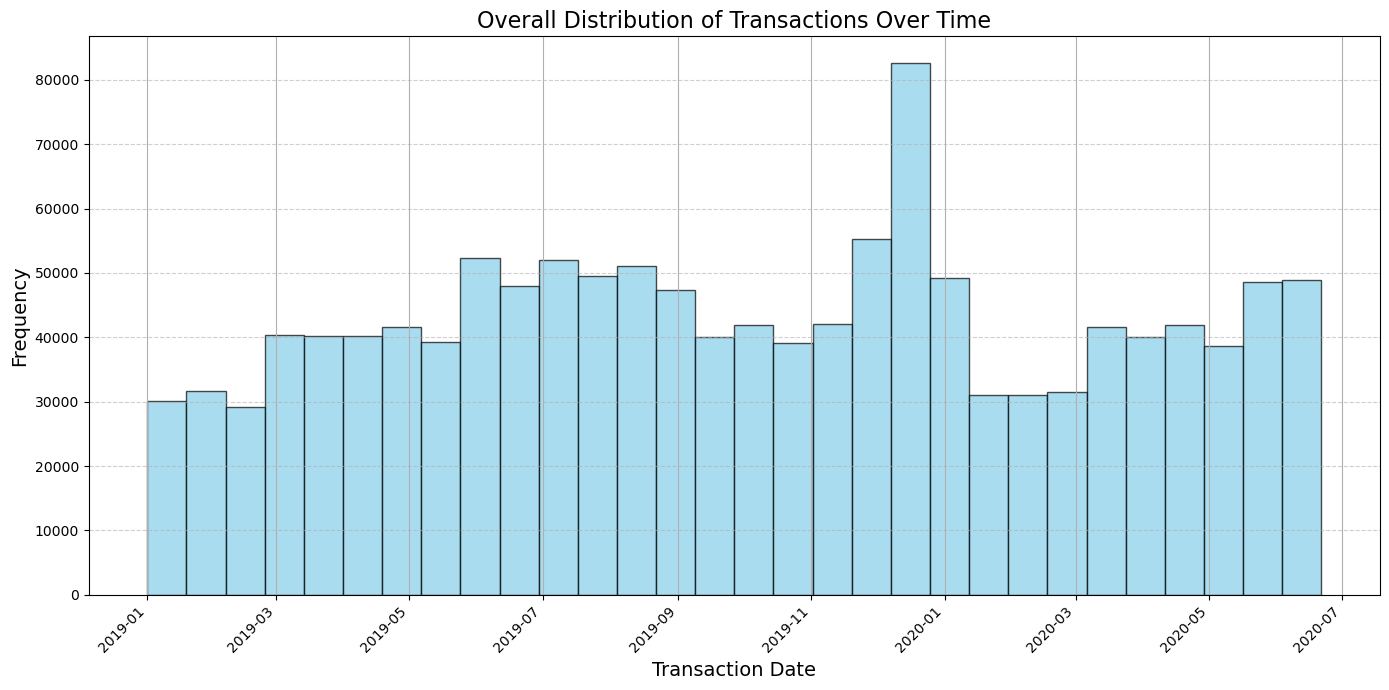

In [21]:
plt.figure(figsize=(14, 7))
df['trans_date_trans_time'].hist(bins=30, edgecolor='black', color='skyblue', alpha=0.7)

# Customize the plot
plt.title('Overall Distribution of Transactions Over Time', fontsize=16)
plt.xlabel('Transaction Date', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add subtle gridlines

# Display the plot
plt.tight_layout()
plt.show()

##### Note 

Based of the distribution there is a huge spike around the end of the year (2019).

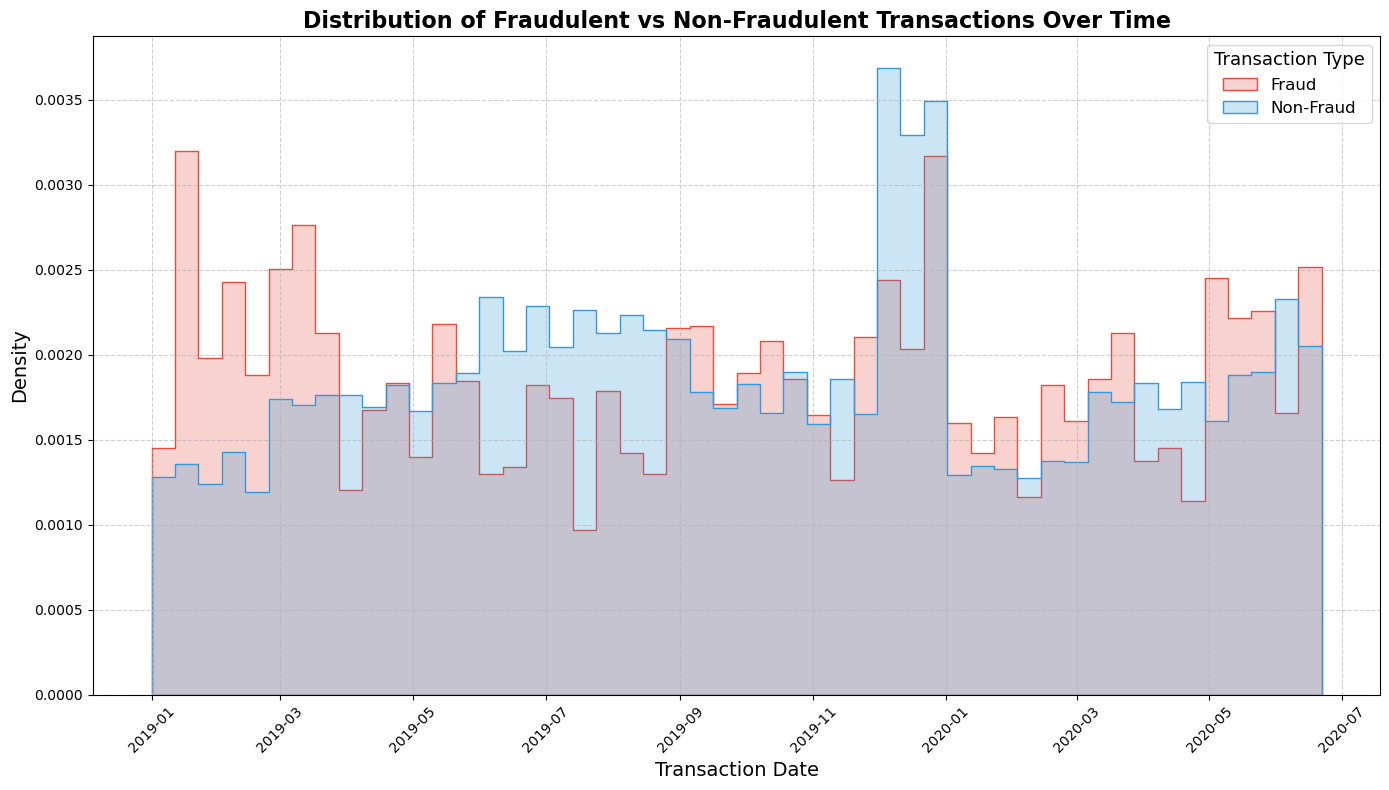

In [26]:
# Define a custom color palette
colors = ["#3498db", "#e74c3c"]  # Blue for non-fraud, red for fraud

# Create the plot
plt.figure(figsize=(14, 8))
sns.histplot(
    data=df, 
    x='trans_date_trans_time', 
    hue='is_fraud', 
    bins=50, 
    element='step', 
    stat='density', 
    common_norm=False,
    palette=colors
)

# Add grid
plt.grid(True, linestyle='--', alpha=0.6)

# Customize the title and labels
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions Over Time', 
          fontsize=16, 
          fontweight='bold')
plt.xlabel('Transaction Date', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Customize the legend
plt.legend(title='Transaction Type', 
           title_fontsize='13', 
           fontsize='12', labels=['Fraud','Non-Fraud'])

# Improve the x-axis date format
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

#### Note 
- The fraudulent activities show a variation over time. So we need to keep in mind that season might not have an effect on fraudulent activities.**
- We still have peaks for fraud transactions but in the grand skim of things its leaning on the variation side. Early in the year and end of year. 

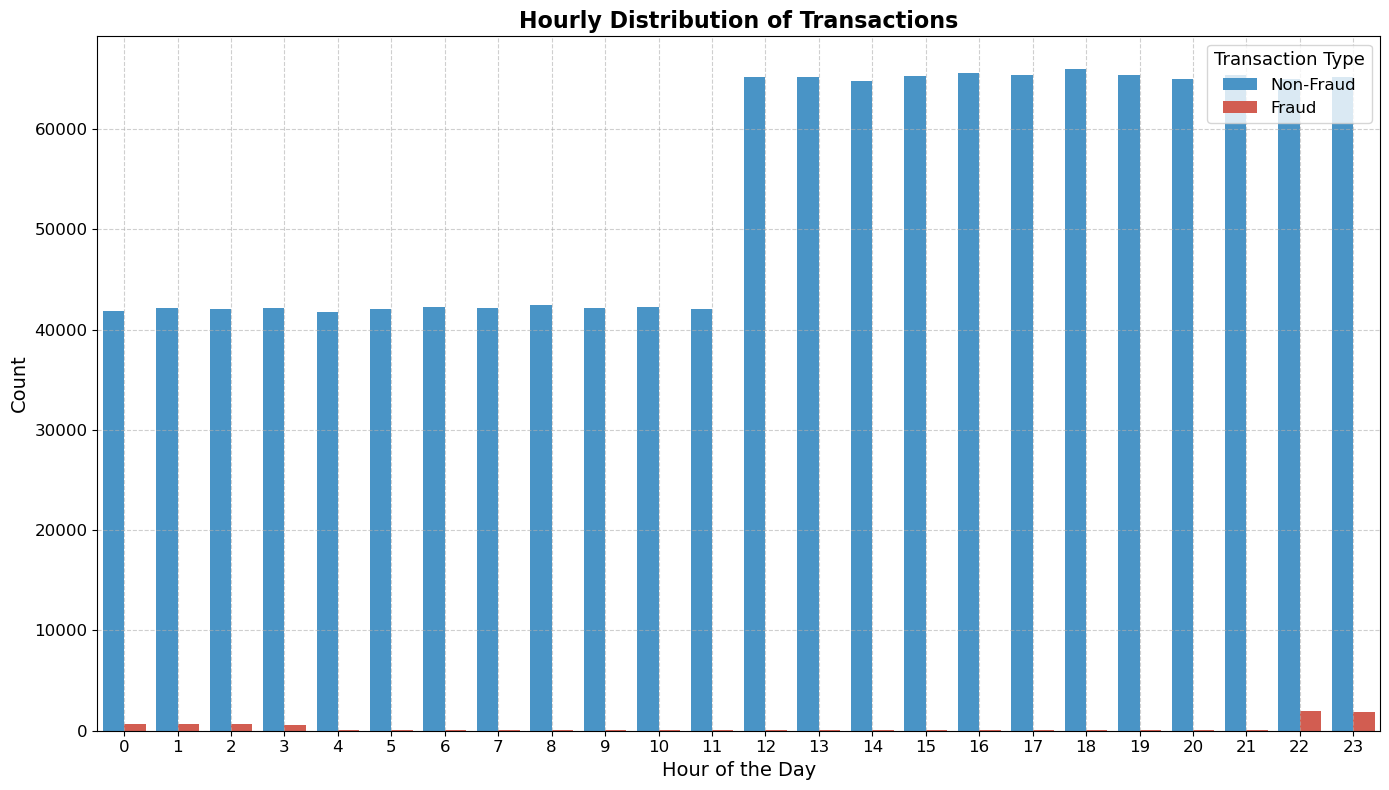

In [31]:
# Create the plot
plt.figure(figsize=(14, 8))
sns.countplot(
    data=df, 
    x='trans_hour', 
    hue='is_fraud', 
    palette=colors
)

# Add grid
plt.grid(True, linestyle='--', alpha=0.6)

# Customize the title and labels
plt.title('Hourly Distribution of Transactions', fontsize=16, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Customize the legend and move it to the upper right
plt.legend(title='Transaction Type', title_fontsize='13', fontsize='12', labels=['Non-Fraud', 'Fraud'], loc='upper right')

# Enhance the appearance of the x and y-axis ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

From first glance we can see a normal behavior with spending but the fradulent one needs further investigation. 

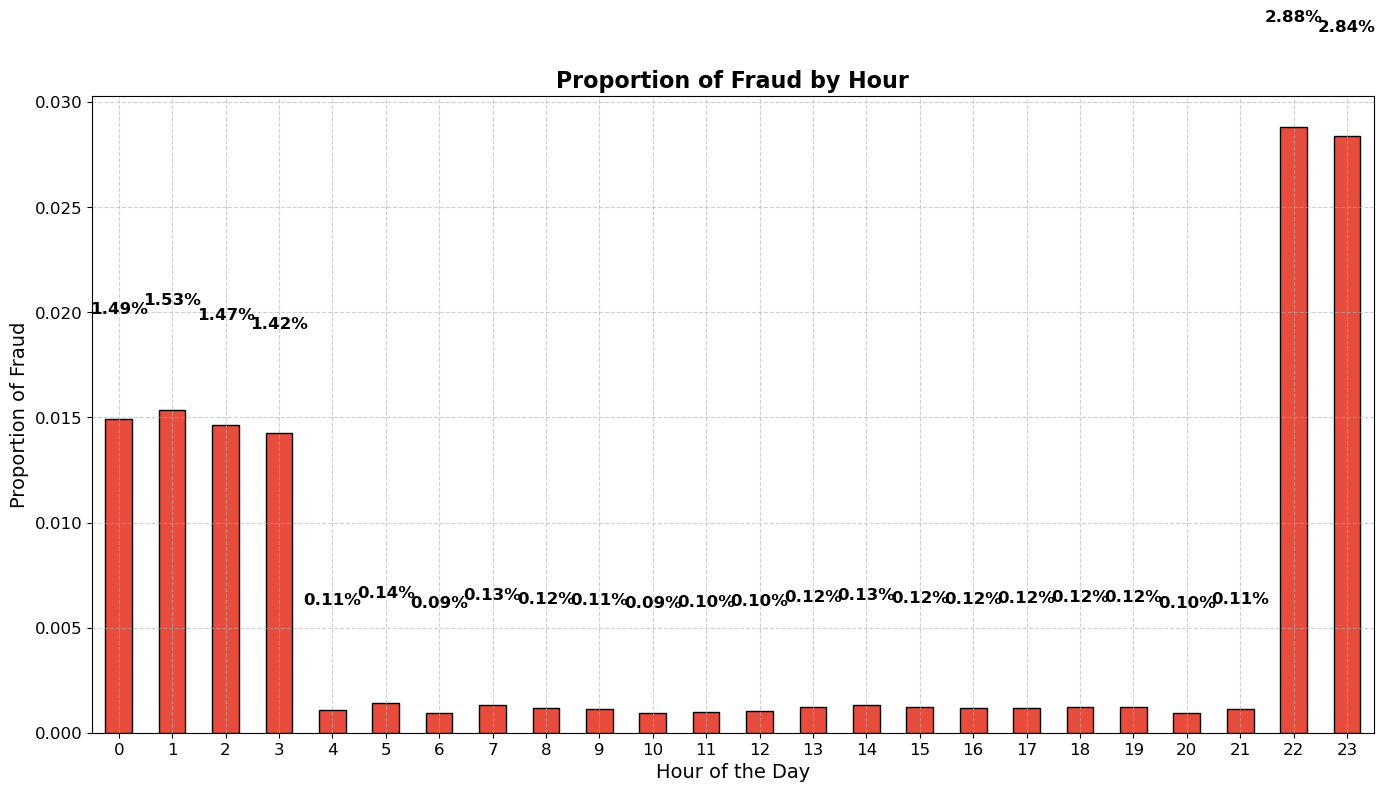

In [32]:
# Define a custom color palette
color = "#e74c3c"  # Red for fraud proportion

# Create the plot
plt.figure(figsize=(14, 8))
hourly_fraud_proportion.plot(kind='bar', color=color, edgecolor='black')

# Add grid
plt.grid(True, linestyle='--', alpha=0.6)

# Customize the title and labels
plt.title('Proportion of Fraud by Hour', fontsize=16, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Proportion of Fraud', fontsize=14)

# Enhance the appearance of the x and y-axis ticks
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Add value labels on top of each bar
for index, value in enumerate(hourly_fraud_proportion):
    plt.text(index, value + 0.005, f'{value:.2%}', ha='center', fontsize=12, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

#### Note
- If we dive deeper, most if the fraudulent transactions are typically done all day but at Night time between 10 pm - 3 am we have an increase.
- Can this be due to the fact that the victim might be in bed?.
- It is clear that hour of the day plays a big part in fraudulent transactions.

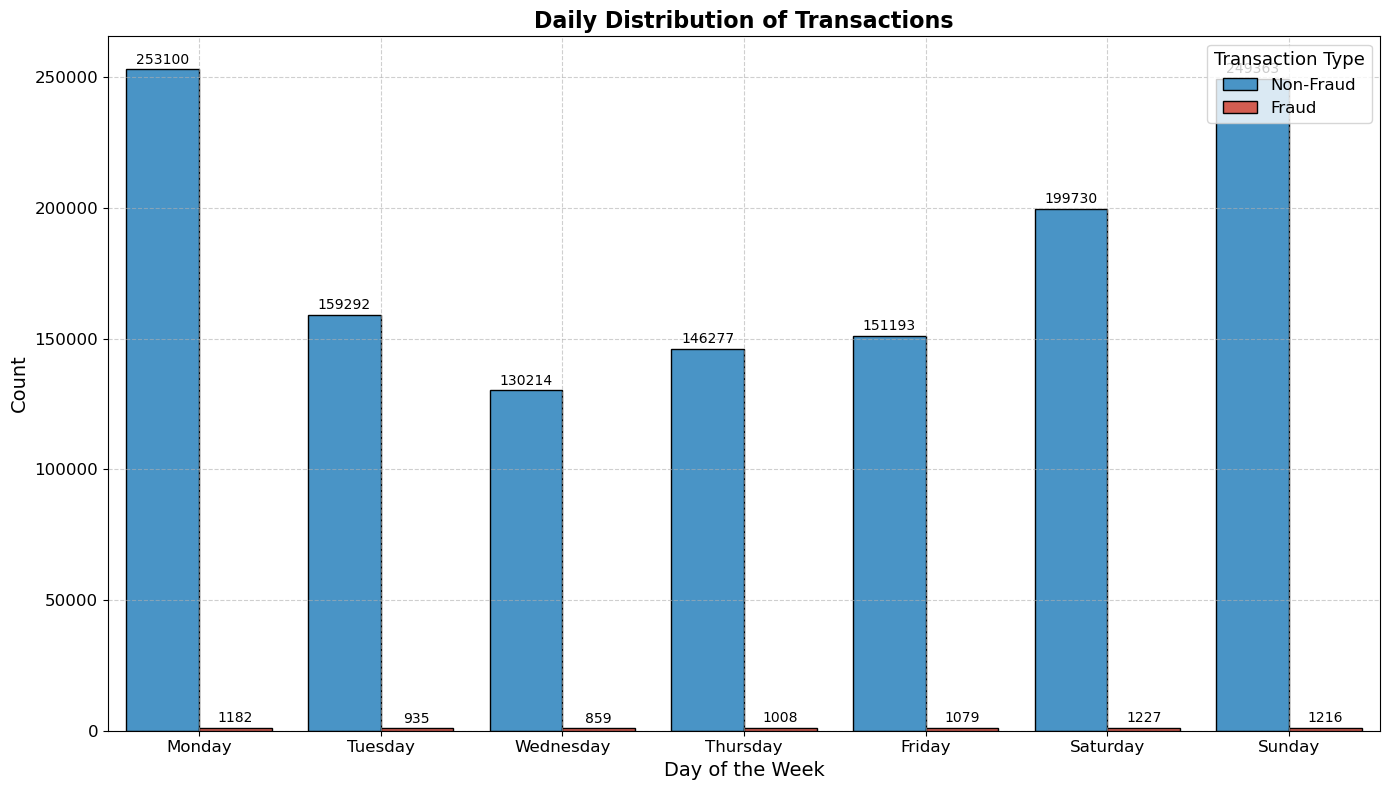

In [37]:
# Assuming df['trans_date_trans_time'] is already in datetime format
df['trans_day'] = df['trans_date_trans_time'].dt.dayofweek

# Map numerical dayofweek to day names
day_name_map = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
df['trans_day_name'] = df['trans_day'].map(day_name_map)

# Define the order of days
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert the 'trans_day_name' column to a categorical type with the specified order
df['trans_day_name'] = pd.Categorical(df['trans_day_name'], categories=ordered_days, ordered=True)

# Define a custom color palette
colors = ["#3498db", "#e74c3c"]  # Blue for non-fraud, red for fraud

# Create the plot
plt.figure(figsize=(14, 8))
sns.countplot(
    data=df, 
    x='trans_day_name', 
    hue='is_fraud', 
    palette=colors,
    edgecolor='black'
)

# Add grid
plt.grid(True, linestyle='--', alpha=0.6)

# Customize the title and labels
plt.title('Daily Distribution of Transactions', fontsize=16, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Customize the legend and move it to the upper right
plt.legend(title='Transaction Type', title_fontsize='13', fontsize='12', labels=['Non-Fraud', 'Fraud'], loc='upper right')

# Enhance the appearance of the x and y-axis ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add value labels on top of each bar
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=2)

# Show the plot
plt.tight_layout()
plt.show()

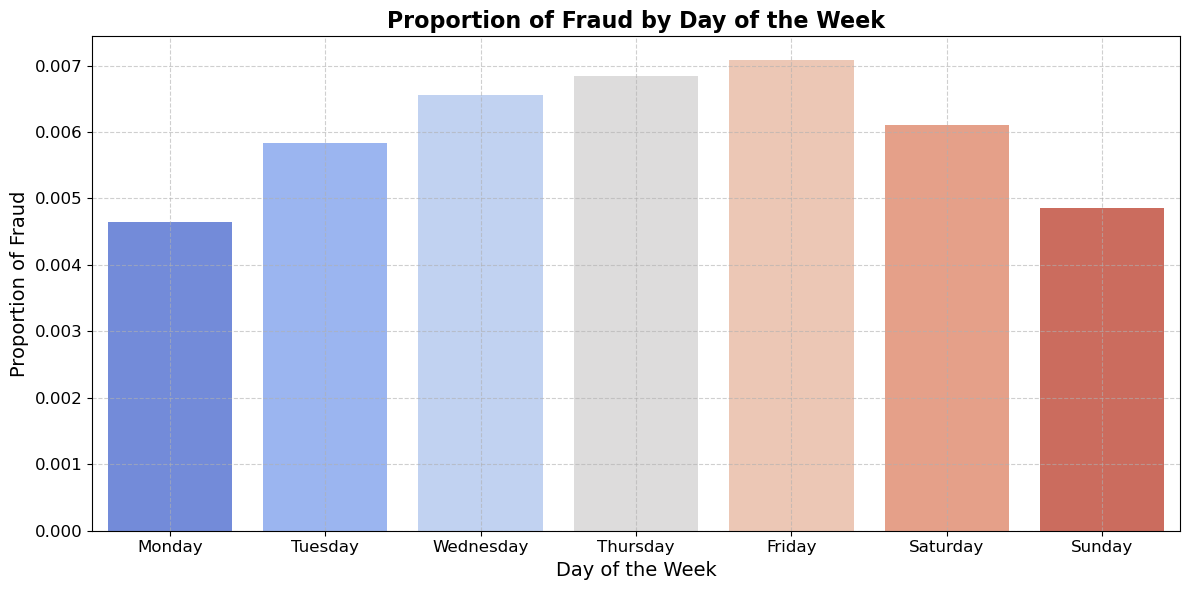

In [39]:
# Map numerical dayofweek to day names
day_name_map = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
df['trans_day_name'] = df['trans_day'].map(day_name_map)

# Calculate the proportion of fraud by day of the week
daily_fraud_proportion = df.groupby('trans_day_name')['is_fraud'].mean()

# Define the order of days for plotting
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot the proportion of fraud by day
plt.figure(figsize=(12, 6))
sns.barplot(x=daily_fraud_proportion.index, y=daily_fraud_proportion.values, order=ordered_days, palette='coolwarm')

# Customize the plot
plt.title('Proportion of Fraud by Day of the Week', fontsize=16, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Proportion of Fraud', fontsize=14)

# Enhance the appearance of the x and y-axis ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

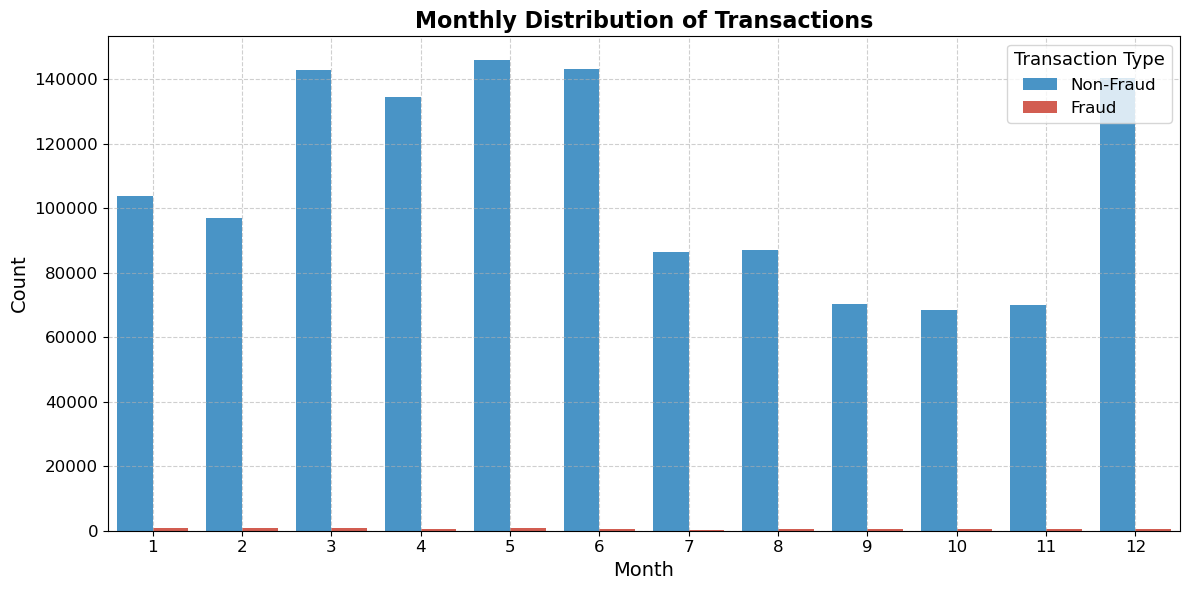

In [40]:
# Define a custom color palette
colors = ['#3498db', '#e74c3c']  # Blue for non-fraud, red for fraud

# Create the plot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='trans_month', hue='is_fraud', palette=colors)

# Customize the plot
plt.title('Monthly Distribution of Transactions', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Customize legend and move it to upper right
plt.legend(title='Transaction Type', title_fontsize='13', fontsize='12', labels=['Non-Fraud', 'Fraud'], loc='upper right')

# Enhance the appearance of the x and y-axis ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

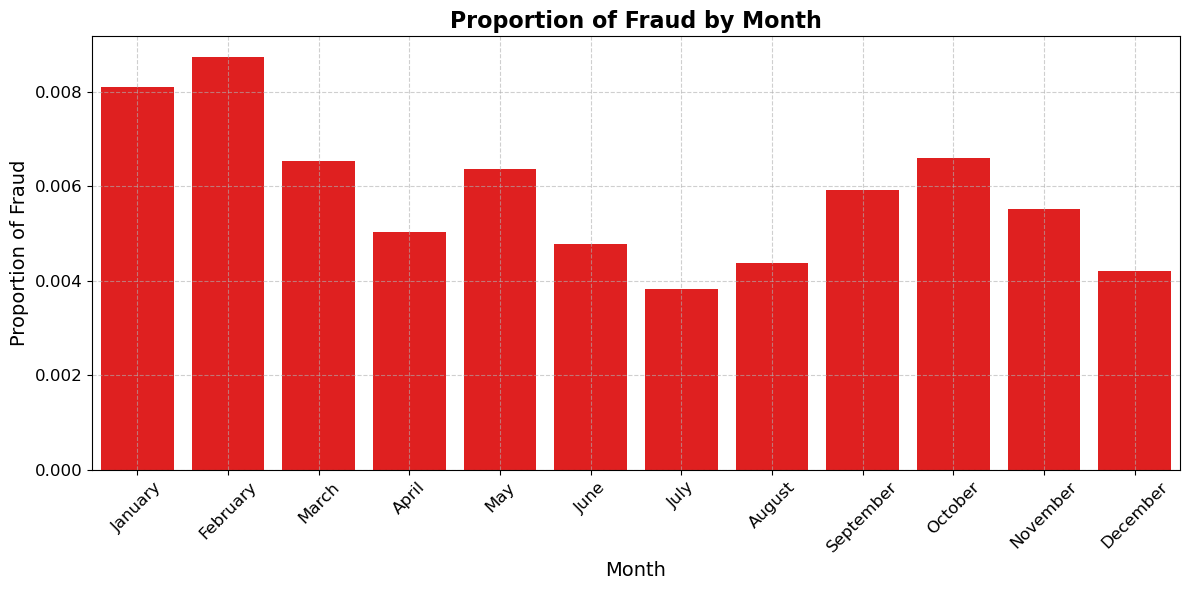

In [43]:
# Calculate the proportion of fraud by month
monthly_fraud_proportion = df.groupby('trans_month')['is_fraud'].mean()

# Define the order of months for plotting
ordered_months = ['January', 'February', 'March', 'April', 'May', 'June', 
                  'July', 'August', 'September', 'October', 'November', 'December']

# Plot the proportion of fraud by month
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_fraud_proportion.index.map(lambda x: calendar.month_name[x]), 
            y=monthly_fraud_proportion.values, order=ordered_months, color='red')

# Customize the plot
plt.title('Proportion of Fraud by Month', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Proportion of Fraud', fontsize=14)

# Enhance the appearance of the x and y-axis ticks
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Add grid
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

In [44]:
# Calculate the time since the last transaction for each card
df.sort_values(by=['cc_num', 'trans_date_trans_time'], inplace=True)
df['time_since_last_trans'] = df.groupby('cc_num')['trans_date_trans_time'].diff().dt.total_seconds() / 3600.0  # in hours

# Handle missing values
df['time_since_last_trans'].fillna(df['time_since_last_trans'].mean(), inplace=True)


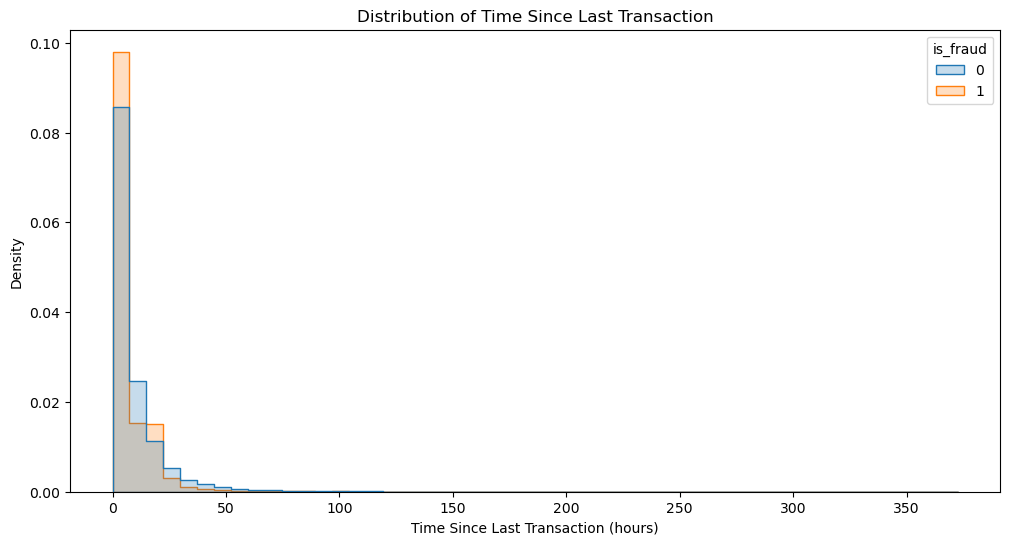

In [45]:
# Plot the distribution of time since the last transaction for fraud and non-fraud transactions
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='time_since_last_trans', hue='is_fraud', bins=50, element='step', stat='density', common_norm=False)
plt.title('Distribution of Time Since Last Transaction')
plt.xlabel('Time Since Last Transaction (hours)')
plt.ylabel('Density')
plt.show()


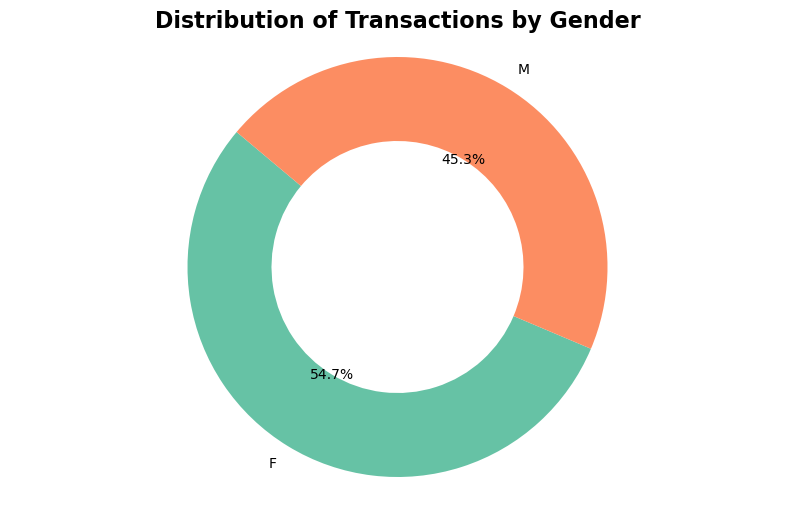

In [48]:
# Count the number of transactions by gender
gender_counts = df['gender'].value_counts()

# Colors for the pie chart
colors = sns.color_palette('Set2', len(gender_counts))

# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops=dict(width=0.4))

# Adding title and formatting
plt.title('Distribution of Transactions by Gender', fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

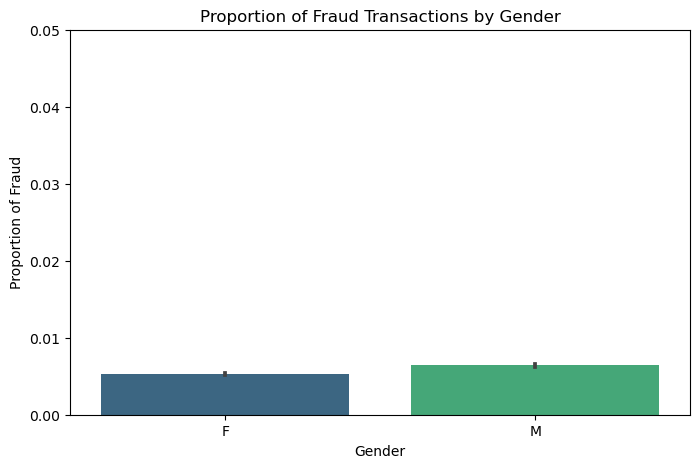

In [50]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='gender', y='is_fraud', estimator=lambda x: sum(x)/len(x), palette='viridis')
plt.title('Proportion of Fraud Transactions by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion of Fraud')
plt.ylim(0, 0.05)  # Limit y-axis to show detailed differences
plt.show()

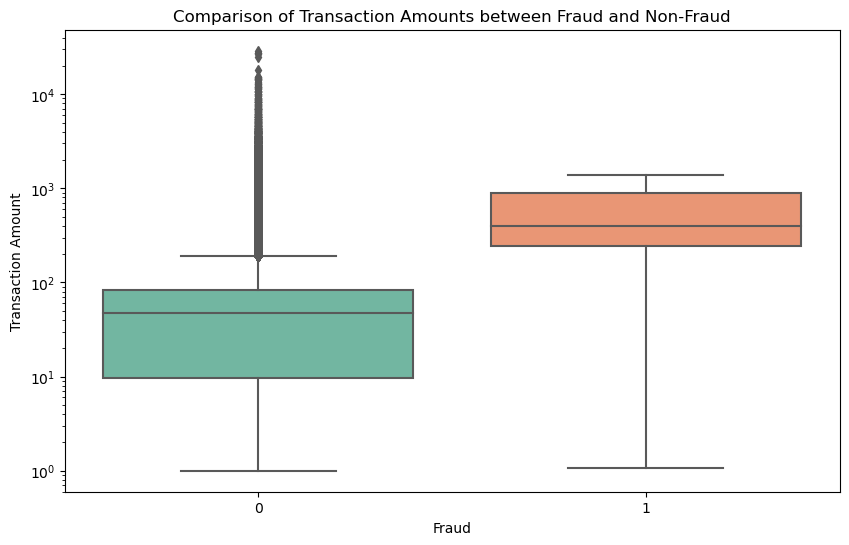

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='is_fraud', y='amt', palette='Set2')
plt.title('Comparison of Transaction Amounts between Fraud and Non-Fraud')
plt.xlabel('Fraud')
plt.ylabel('Transaction Amount')
plt.yscale('log')  # Log scale for better visualization of large range of transaction amounts
plt.show()


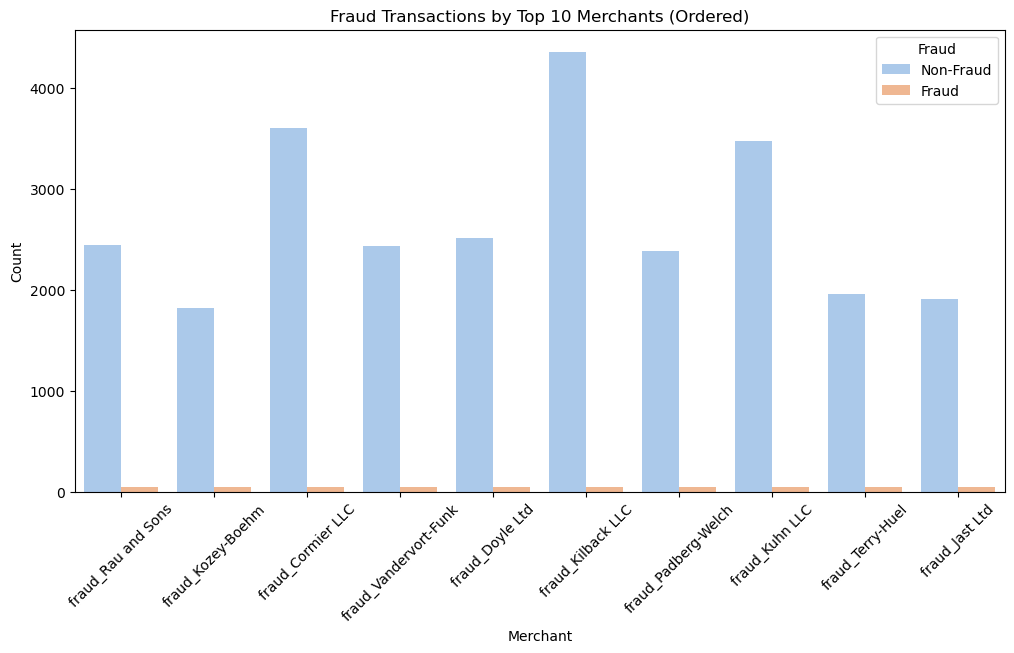

In [54]:
# Calculate the number of fraud transactions for each merchant
fraud_counts = df[df['is_fraud'] == 1]['merchant'].value_counts()

# Get the top 10 merchants with the most fraud transactions
top_merchants_fraud = fraud_counts.head(10).index

# Filter the dataframe to include only transactions from the top 10 fraud merchants
df_top_merchants_fraud = df[df['merchant'].isin(top_merchants_fraud)]

# Plotting the count of fraud transactions by merchant (ordered from most to least fraud)
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_merchants_fraud, x='merchant', hue='is_fraud', palette='pastel', order=top_merchants_fraud)
plt.title('Fraud Transactions by Top 10 Merchants (Ordered)')
plt.xlabel('Merchant')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Fraud', labels=['Non-Fraud', 'Fraud'], loc='upper right')
plt.show()